<a href="https://colab.research.google.com/github/qingchen815/CruiseFetchLite/blob/main/cruiseFetch_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file saved successfully: ipc.csv


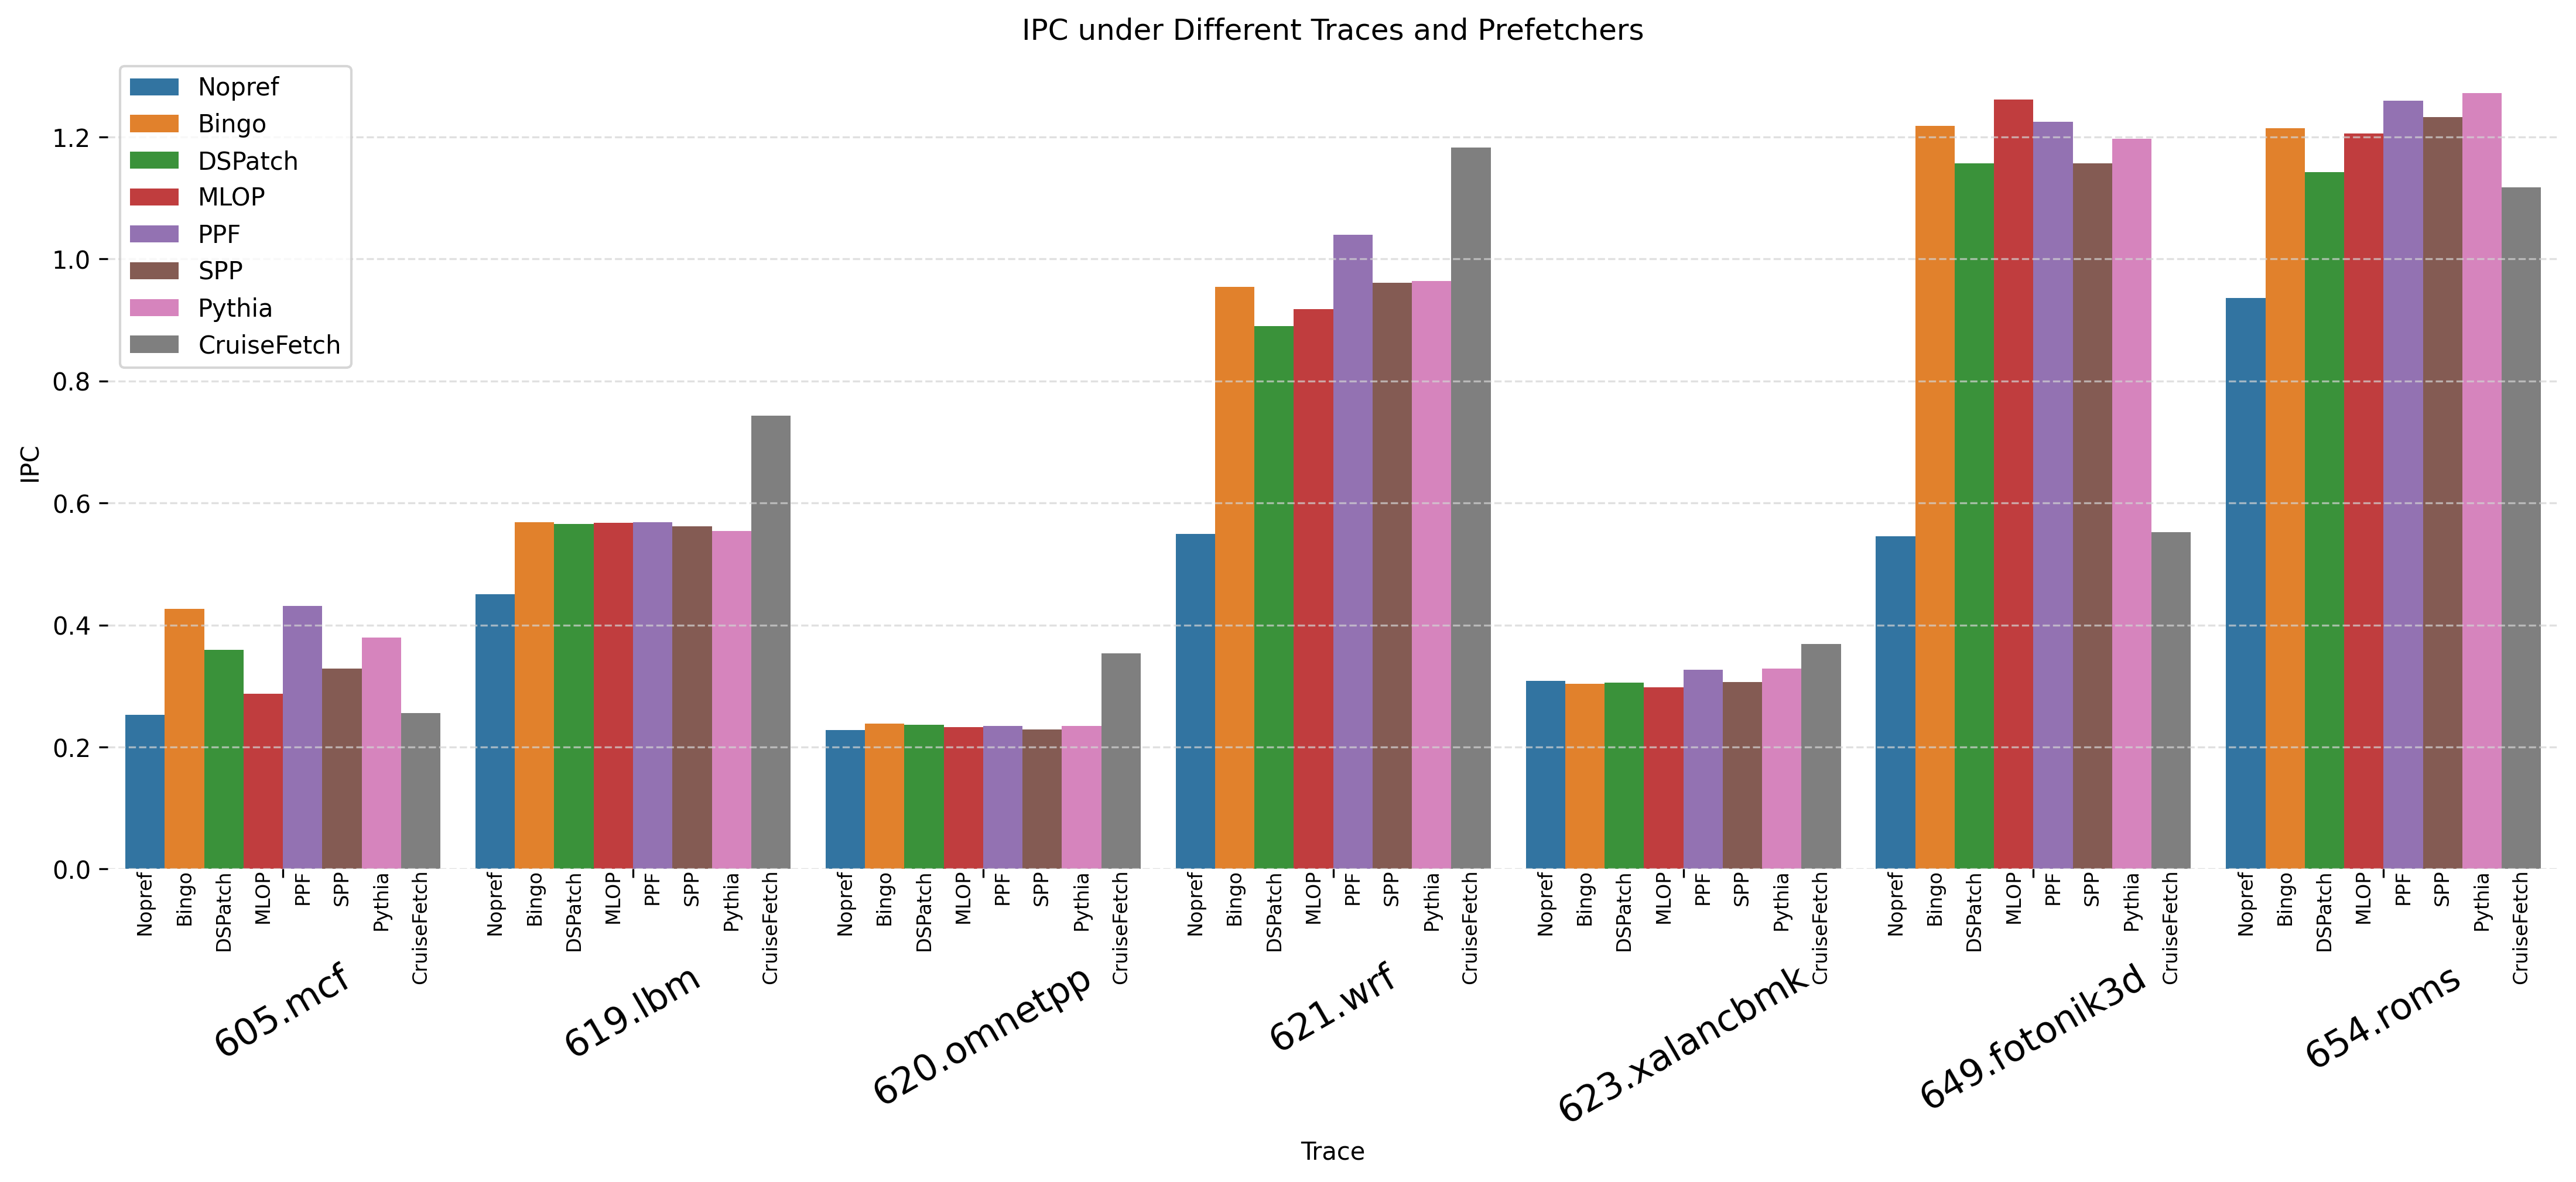

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/analysis_data.csv')

# Set the figure resolution
plt.rcParams['figure.dpi'] = 300

# Set the figure size, increase the width to provide more space for labels
plt.figure(figsize=(18, 8))

# Define the order of Prefetcher
prefetcher_order = ['Nopref', 'Bingo', 'DSPatch', 'MLOP', 'PPF', 'SPP', 'Pythia', 'CruiseFetch']
df['Prefetcher'] = pd.Categorical(df['Prefetcher'], categories=prefetcher_order, ordered=True)

# Sort the DataFrame by Trace and then by Prefetcher
df = df.sort_values(by=['Trace', 'Prefetcher'])

# Save the sorted data to a CSV file in the user's local directory
local_csv_path = "ipc.csv"
df[['Trace', 'Prefetcher','Core_0_IPC']].to_csv(local_csv_path, index=False)

print(f"CSV file saved successfully: {local_csv_path}")

# Plot the bar chart of Core_0_IPC grouped by Prefetcher
# Increase the width of the bar groups
bar_group_width = 0.9
bar_width = bar_group_width / len(df['Prefetcher'].unique())
ax = sns.barplot(data=df, x='Trace', y='Core_0_IPC', hue='Prefetcher', width=bar_group_width)

# Get unique traces and prefetchers
traces = df['Trace'].unique()
prefetchers = df['Prefetcher'].unique()
num_prefetchers = len(prefetchers)
num_traces = len(traces)

# Add vertical Prefetcher labels below each bar group
prefetcher_label_offset = 0  # Adjust this value to move Prefetcher labels up or down
for i, trace in enumerate(traces):
    for j, prefetcher in enumerate(prefetchers):
        bar_x = i - bar_group_width / 2 + (j + 0.5) * bar_width
        ax.text(bar_x, prefetcher_label_offset, prefetcher, ha='center', va='top', rotation=90, fontsize=8)

# Set the title and axis labels
plt.title('IPC under Different Traces and Prefetchers')
plt.ylabel('IPC')

# Move Trace labels down and adjust font size
trace_label_offset = -0.1  # Adjust this value to move Trace labels up or down
plt.xticks(range(num_traces), traces, rotation=30, ha='center', va='top', fontsize=15)
plt.gca().tick_params(axis='x', pad=0)
for tick in ax.get_xticklabels():
    tick.set_y(trace_label_offset)

# Adjust the subplot to make room for labels
plt.subplots_adjust(bottom=0.3)

# Optimize the y-axis grid lines (dashed lines)
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7, linewidth=0.8)

# Remove the spines (borders) of the plot for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the legend
plt.legend()

# Display the plot
plt.show()

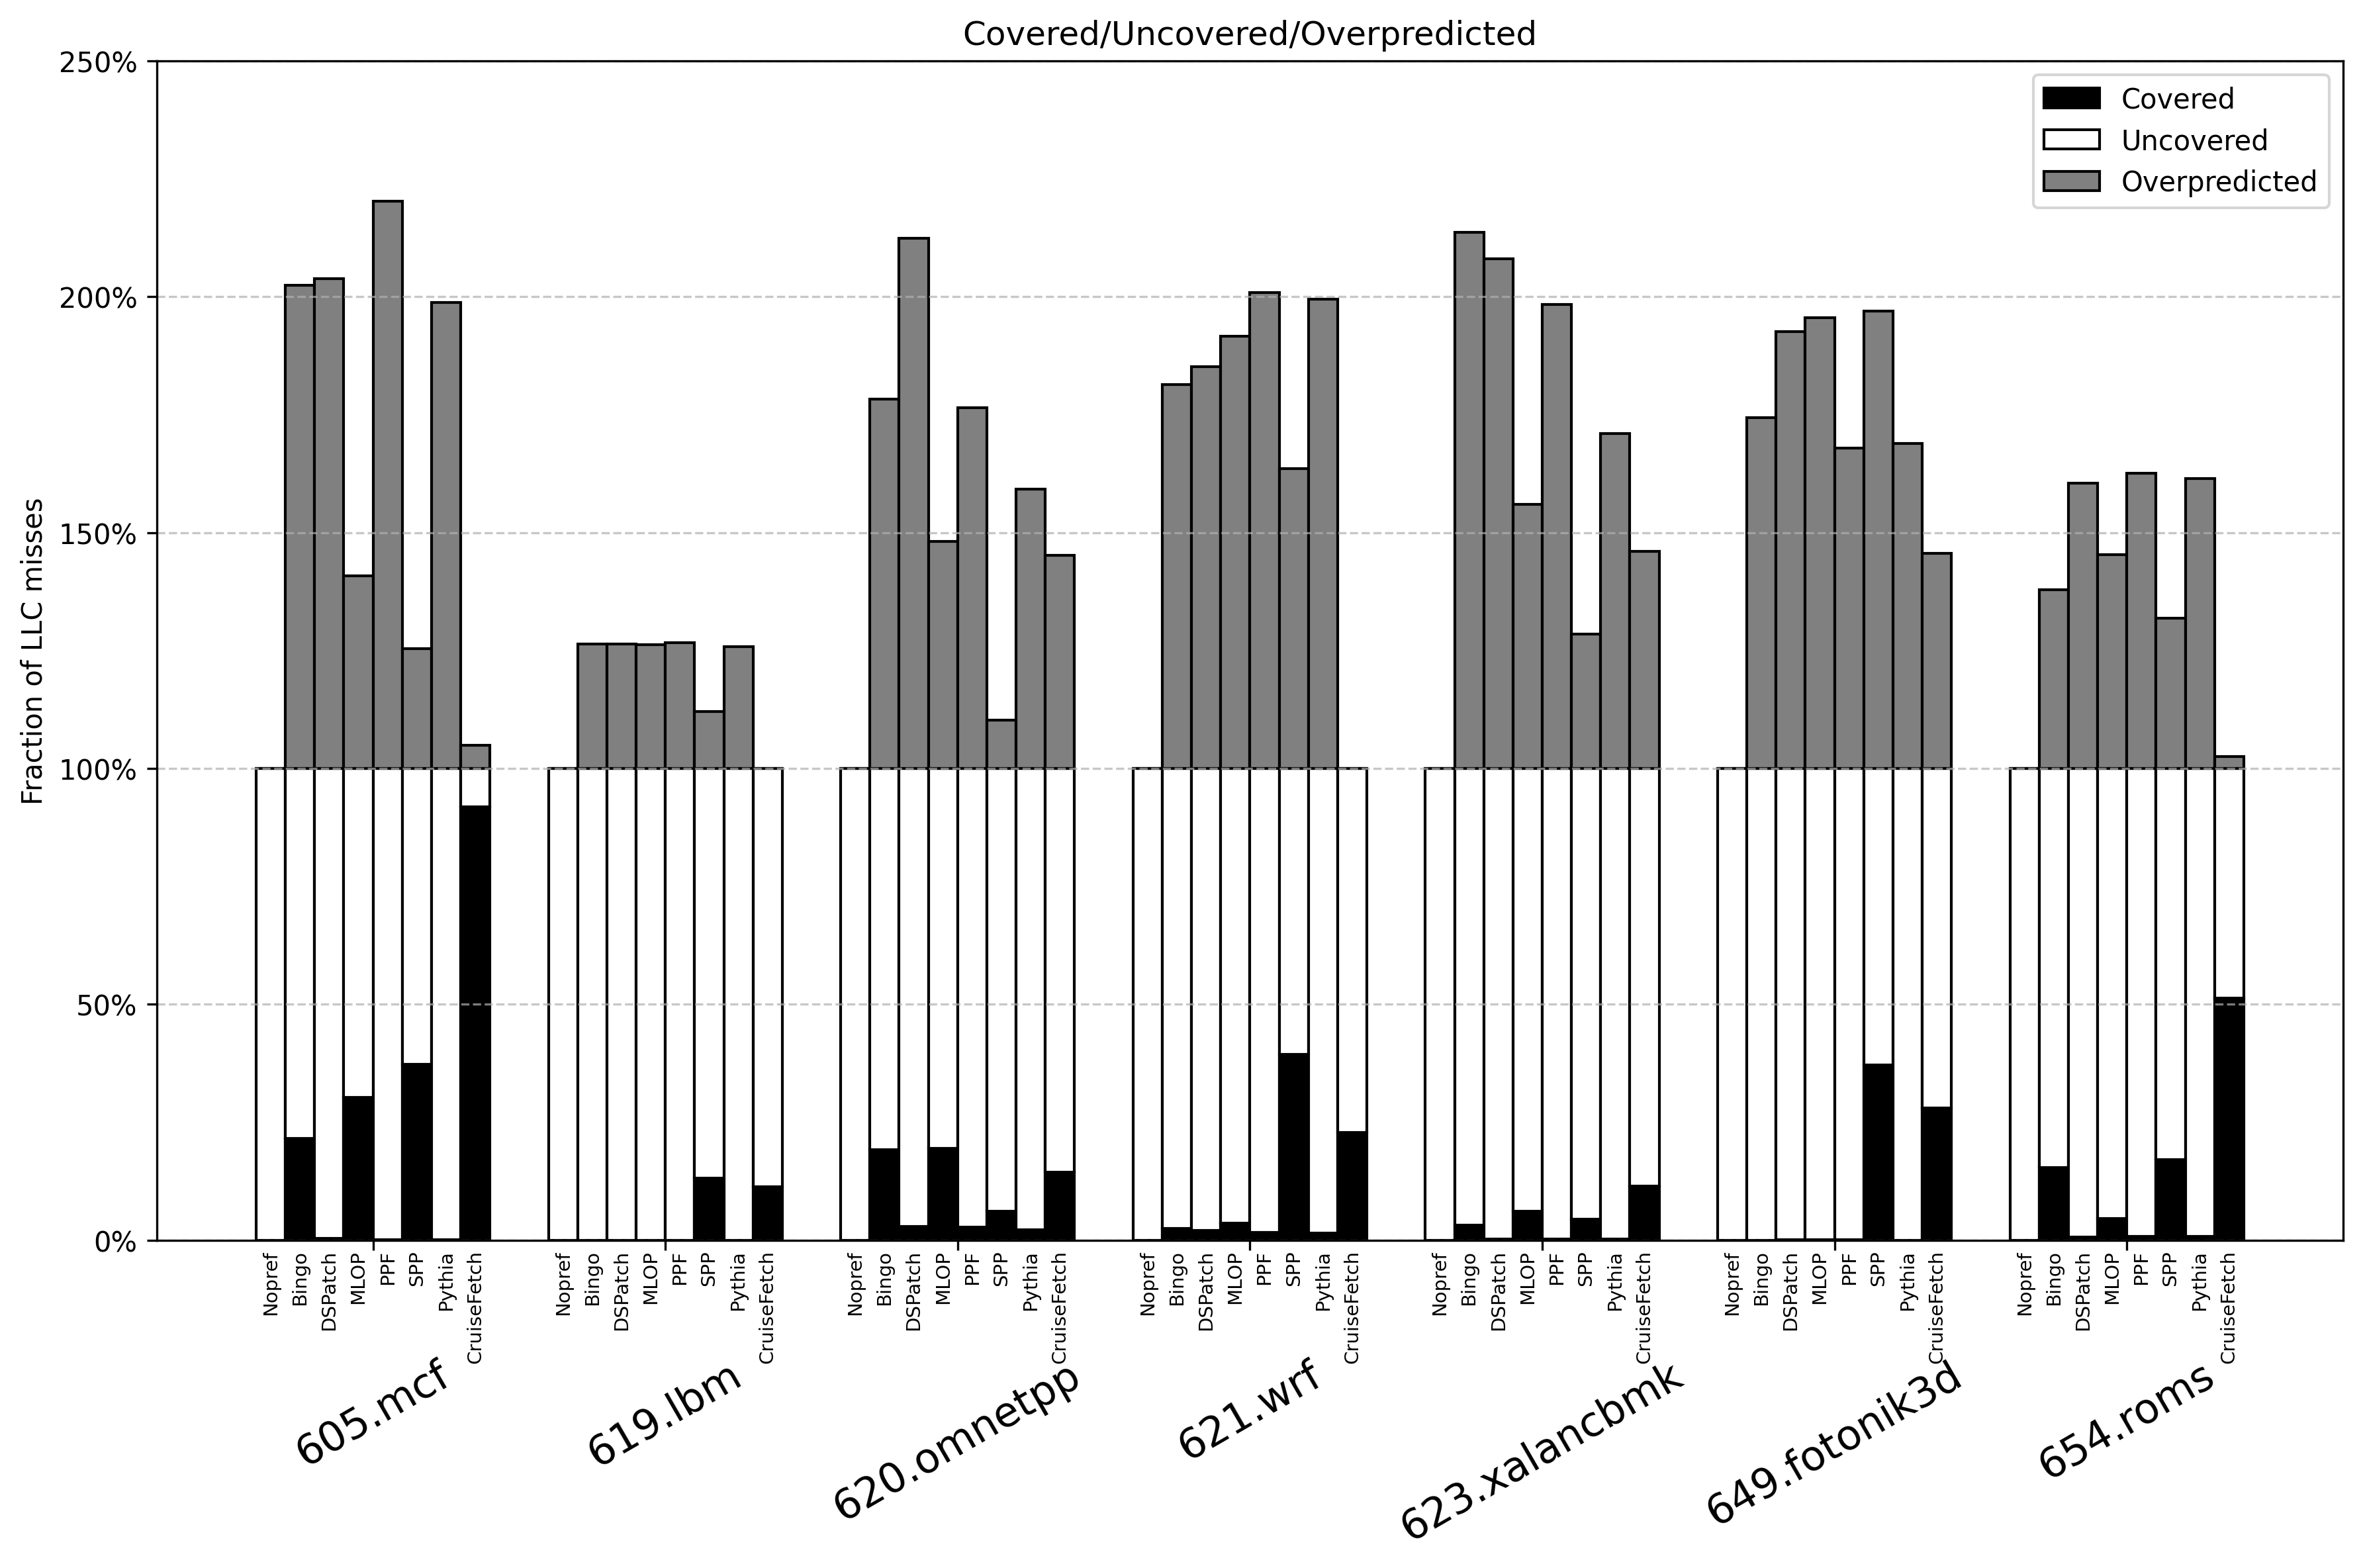

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/analysis_data.csv')

# 按 Trace 列进行排序
df = df.sort_values(by='Trace')

# Set the figure resolution
plt.rcParams['figure.dpi'] = 300

# Set font
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Get the unique values in the 'Trace' and 'Prefetcher' columns
traces = df['Trace'].unique()
num_traces = len(traces)

# Define the desired order of prefetchers
desired_prefetchers = ['Nopref', 'Bingo', 'DSPatch', 'MLOP', 'PPF', 'SPP', 'Pythia', 'CruiseFetch']
# Filter out the prefetchers that are actually in the data
prefetchers = [p for p in desired_prefetchers if p in df['Prefetcher'].unique()]
num_prefetchers = len(prefetchers)

# Width of each bar
bar_width = 0.25

# Gap between groups of bars
group_gap = 0.5

# Positions on the x-axis for each group of bars
x_groups = np.arange(num_traces) * (num_prefetchers * bar_width + group_gap)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize max_value to track the maximum value of the stacked bars
max_value = 0

# Iterate over different prefetchers in the desired order
for i, prefetcher in enumerate(prefetchers):
    subset = df[df['Prefetcher'] == prefetcher]
    covered = subset['Covered'].values
    uncovered = subset['Uncovered'].values
    overpredicted = subset['Overpredicted'].values

    # Draw the stacked bar chart
    bottom = np.zeros(num_traces)
    ax.bar(x_groups + i * bar_width, covered, bar_width, label='Covered' if i == 0 else "", bottom=bottom, color='black', edgecolor='black')
    bottom += covered
    ax.bar(x_groups + i * bar_width, uncovered, bar_width, label='Uncovered' if i == 0 else "", bottom=bottom, color='white', edgecolor='black')
    bottom += uncovered
    ax.bar(x_groups + i * bar_width, overpredicted, bar_width, label='Overpredicted' if i == 0 else "", bottom=bottom, color='grey', edgecolor='black')

    # Update max_value
    total = covered + uncovered + overpredicted
    current_max = np.max(total)
    if current_max > max_value:
        max_value = current_max

# Add Prefetcher labels centered above each bar group
for i, trace in enumerate(traces):
    for j, prefetcher in enumerate(prefetchers):
        ax.text(x_groups[i] + j * bar_width, -0.02, prefetcher, ha='center', va='top', rotation=90, fontsize=7)

# Set the x-axis ticks and labels for Trace
# Set ticks at the center of each group of bars
ax.set_xticks(x_groups + bar_width * (num_prefetchers - 1) / 2)
# Add Trace labels below the Prefetcher labels
ax.set_xticklabels(traces, rotation=30, ha='center', fontsize=15)

# Adjust the subplot parameters to make more room for the labels
plt.subplots_adjust(bottom=0.3)

# Move the Trace labels further down
ax.tick_params(axis='x', which='major', pad=38)

# Set the y-axis ticks and labels
# Ensure max_value is at least 1 (100%)
max_value = max(max_value, 1)
# Round up max_value to the nearest multiple of 0.5
max_y = np.ceil(max_value * 2) / 2
y_ticks = np.arange(0, max_y + 0.5, 0.5)

ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in y_ticks])

# Set the title and axis labels of the chart
ax.set_title('Covered/Uncovered/Overpredicted')
#ax.set_xlabel('Trace & Prefetcher')
ax.set_ylabel('Fraction of LLC misses')

# Display the legend
ax.legend()

# Add dashed gridlines for the y-axis
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

CSV file saved successfully: prefetch_overhead.csv


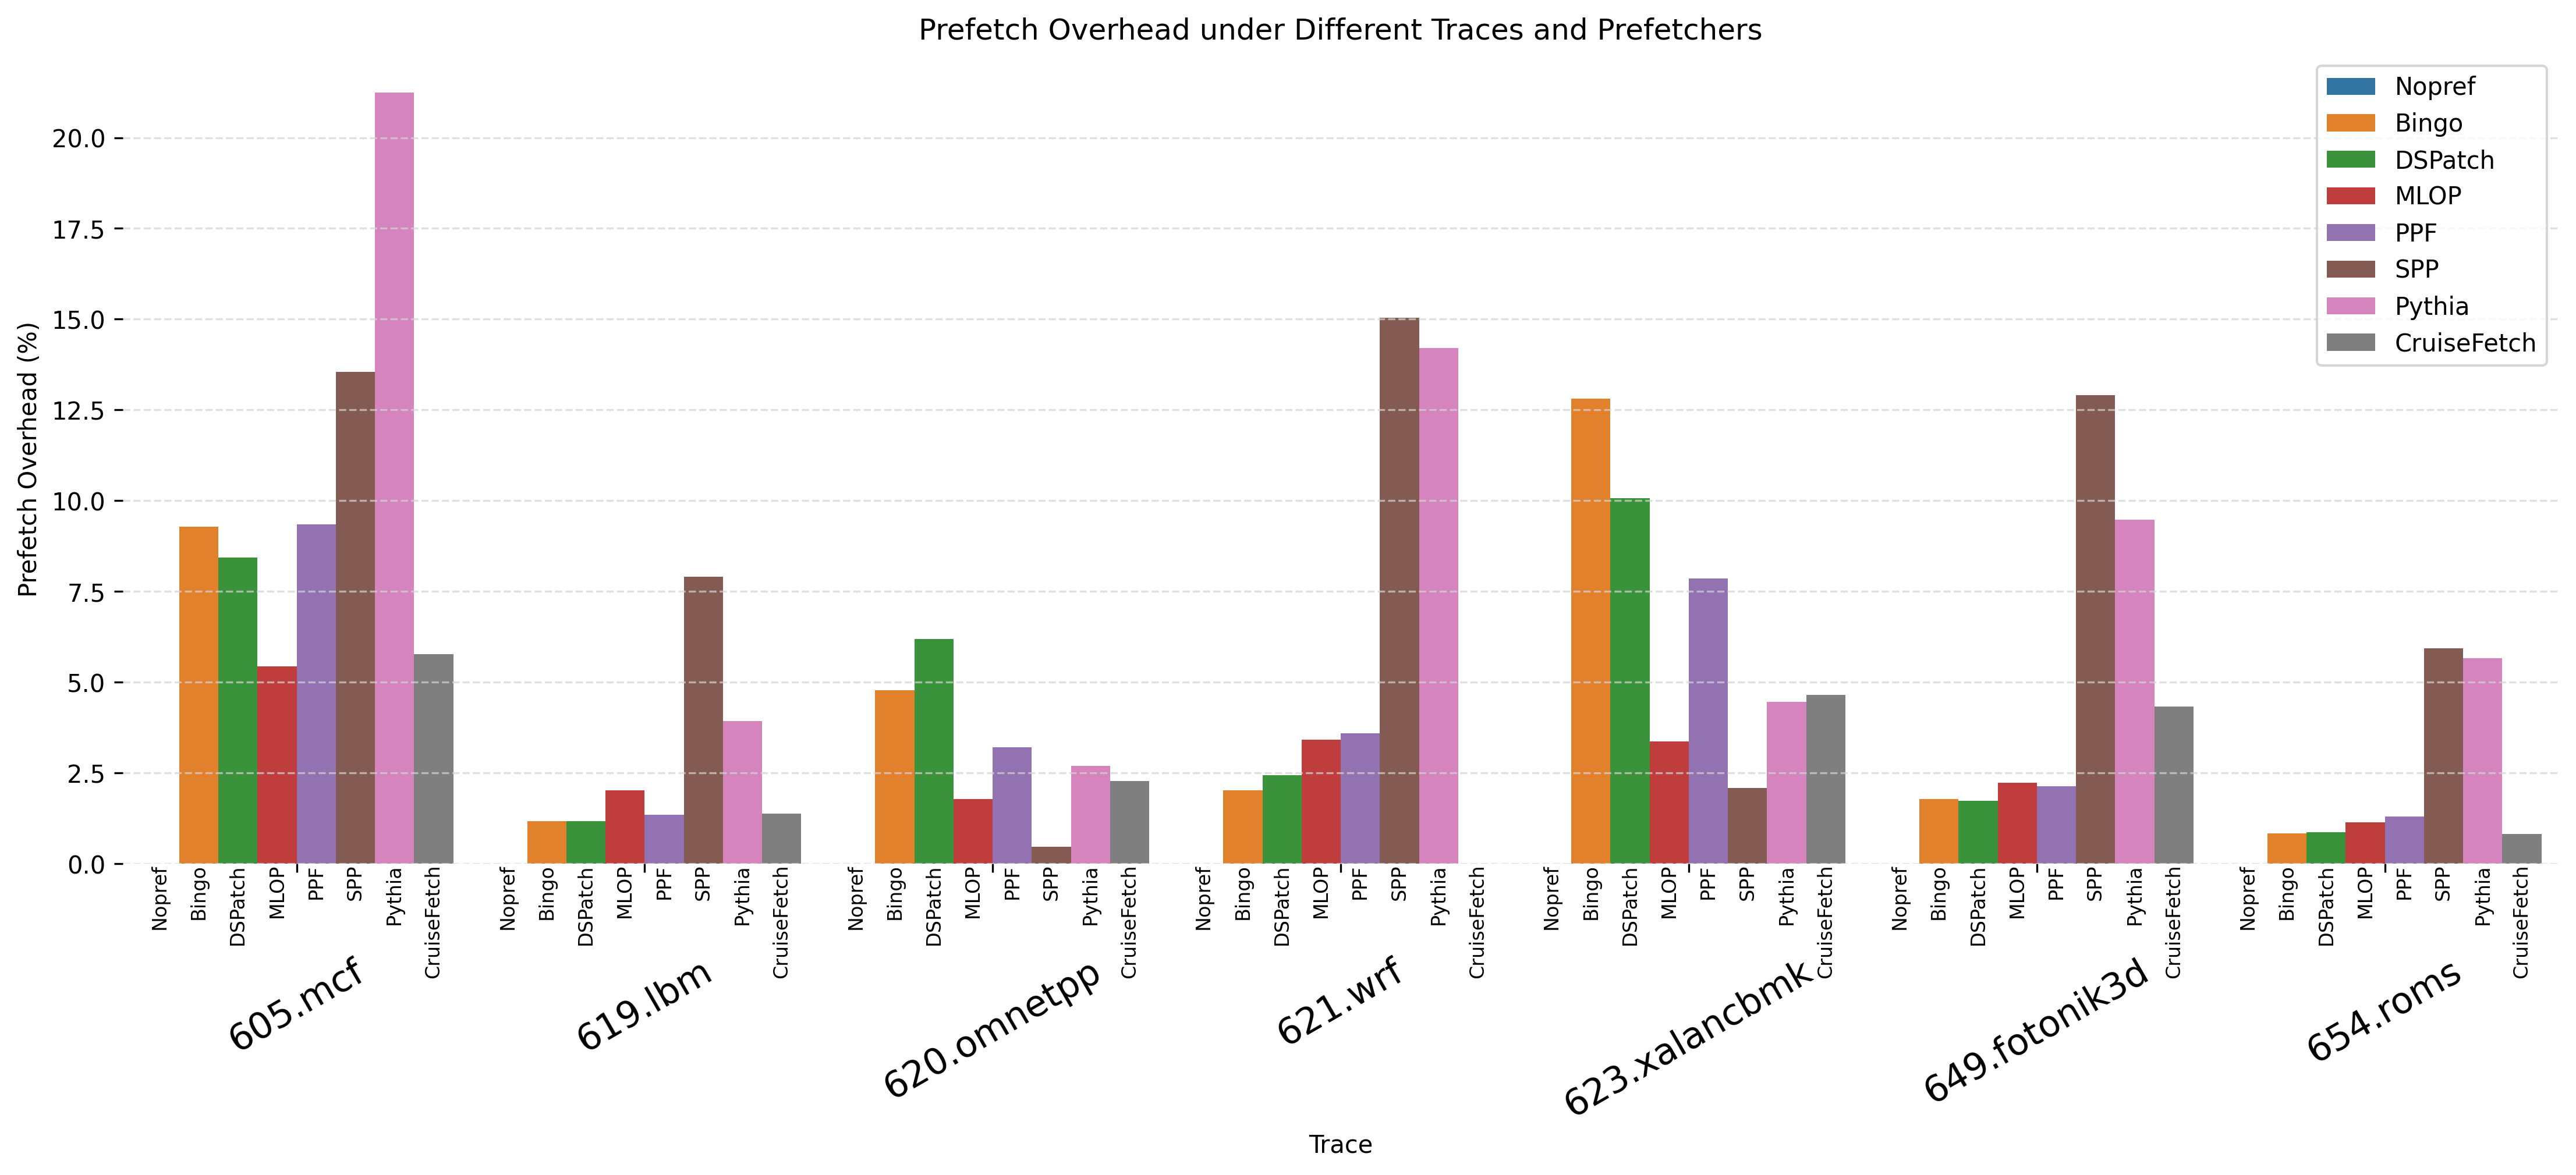

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/analysis_data.csv')


# Set the figure resolution
plt.rcParams['figure.dpi'] = 300

# Set the figure size, increase the width to provide more space for labels
plt.figure(figsize=(18, 8))

# Define the order of Prefetcher
prefetcher_order = ['Nopref', 'Bingo', 'DSPatch', 'MLOP', 'PPF', 'SPP', 'Pythia', 'CruiseFetch']
df['Prefetcher'] = pd.Categorical(df['Prefetcher'], categories=prefetcher_order, ordered=True)

# Sort the DataFrame by Trace and then by Prefetcher
df = df.sort_values(by=['Trace', 'Prefetcher'])

# Save the sorted data to a CSV file in the user's local directory
local_csv_path = "prefetch_overhead.csv"
df[['Trace', 'Prefetcher','Prefetch_Overhead']].to_csv(local_csv_path, index=False)

print(f"CSV file saved successfully: {local_csv_path}")

# Plot the bar chart of Prefetch Overhead grouped by Prefetcher
bar_group_width = 0.9
bar_width = bar_group_width / len(df['Prefetcher'].unique())
ax = sns.barplot(data=df, x='Trace', y='Prefetch_Overhead', hue='Prefetcher', width=bar_group_width)

# Get unique traces and prefetchers
traces = df['Trace'].unique()
prefetchers = df['Prefetcher'].unique()
num_prefetchers = len(prefetchers)
num_traces = len(traces)

# Add vertical Prefetcher labels below each bar group
prefetcher_label_offset = 0  # Adjust this value to move Prefetcher labels up or down
for i, trace in enumerate(traces):
    for j, prefetcher in enumerate(prefetchers):
        bar_x = i - bar_group_width / 2 + (j + 0.5) * bar_width
        ax.text(bar_x, prefetcher_label_offset, prefetcher, ha='center', va='top', rotation=90, fontsize=8)

# Set the title and axis labels
plt.title('Prefetch Overhead under Different Traces and Prefetchers')
plt.ylabel('Prefetch Overhead (%)')

# Move Trace labels down and adjust font size
trace_label_offset = -0.1  # Adjust this value to move Trace labels up or down
plt.xticks(range(num_traces), traces, rotation=30, ha='center', va='top', fontsize=15)
plt.gca().tick_params(axis='x', pad=0)
for tick in ax.get_xticklabels():
    tick.set_y(trace_label_offset)

# Adjust the subplot to make room for labels
plt.subplots_adjust(bottom=0.3)

# Optimize the y-axis grid lines (dashed lines)
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7, linewidth=0.8)

# Remove the spines (borders) of the plot for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the legend
plt.legend()

# Display the plot
plt.show()


CSV file saved successfully: prefetch_accuracy.csv


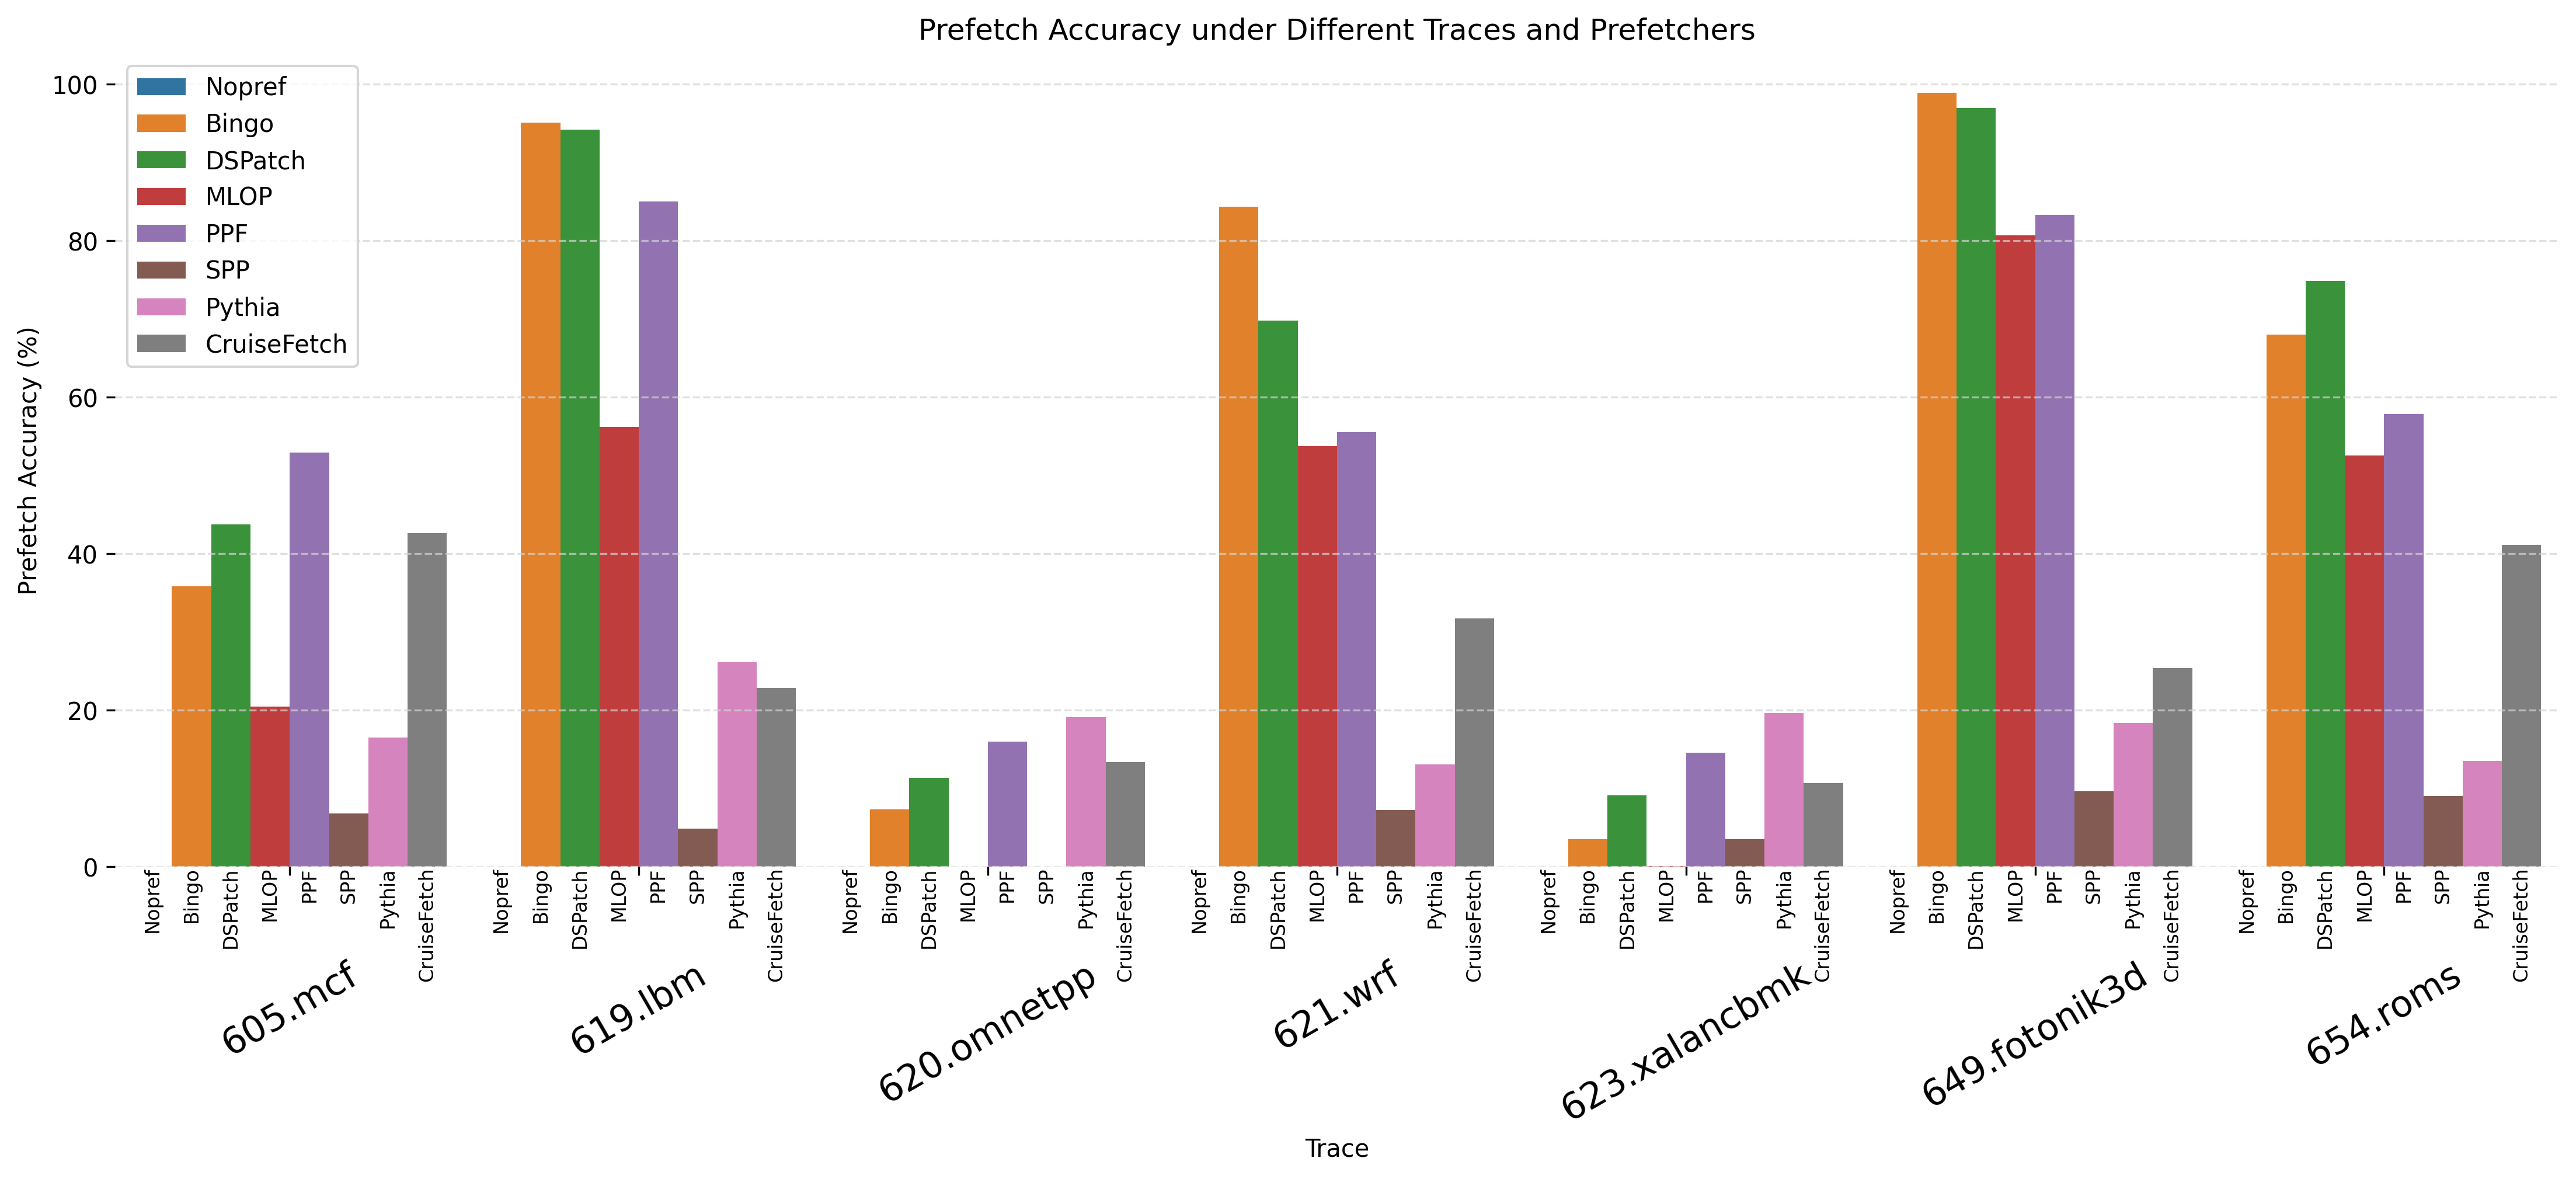

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/analysis_data.csv')


# Avoid division by zero
df['L2C_Prefetch_Accuracy'] = df['L2C_Prefetch_Accuracy'].fillna(0)

# Set the figure resolution
plt.rcParams['figure.dpi'] = 300

# Set the figure size, increase the width to provide more space for labels
plt.figure(figsize=(18, 8))

# Define the order of Prefetcher
prefetcher_order = ['Nopref', 'Bingo', 'DSPatch', 'MLOP', 'PPF', 'SPP', 'Pythia', 'CruiseFetch']
df['Prefetcher'] = pd.Categorical(df['Prefetcher'], categories=prefetcher_order, ordered=True)

# Sort the DataFrame by Trace and then by Prefetcher
df = df.sort_values(by=['Trace', 'Prefetcher'])

# Save the sorted data to a CSV file in the user's local directory
local_csv_path = "prefetch_accuracy.csv"
df[['Trace', 'Prefetcher','L2C_Prefetch_Accuracy']].to_csv(local_csv_path, index=False)

print(f"CSV file saved successfully: {local_csv_path}")

# Plot the bar chart of L2C Prefetch Accuracy grouped by Prefetcher
bar_group_width = 0.9
bar_width = bar_group_width / len(df['Prefetcher'].unique())
ax = sns.barplot(data=df, x='Trace', y='L2C_Prefetch_Accuracy', hue='Prefetcher', width=bar_group_width)

# Get unique traces and prefetchers
traces = df['Trace'].unique()
prefetchers = df['Prefetcher'].unique()
num_prefetchers = len(prefetchers)
num_traces = len(traces)

# Add vertical Prefetcher labels below each bar group
prefetcher_label_offset = 0  # Adjust this value to move Prefetcher labels up or down
for i, trace in enumerate(traces):
    for j, prefetcher in enumerate(prefetchers):
        bar_x = i - bar_group_width / 2 + (j + 0.5) * bar_width
        ax.text(bar_x, prefetcher_label_offset, prefetcher, ha='center', va='top', rotation=90, fontsize=8)

# Set the title and axis labels
plt.title('Prefetch Accuracy under Different Traces and Prefetchers')
plt.ylabel('Prefetch Accuracy (%)')

# Move Trace labels down and adjust font size
trace_label_offset = -0.1  # Adjust this value to move Trace labels up or down
plt.xticks(range(num_traces), traces, rotation=30, ha='center', va='top', fontsize=15)
plt.gca().tick_params(axis='x', pad=0)
for tick in ax.get_xticklabels():
    tick.set_y(trace_label_offset)

# Adjust the subplot to make room for labels
plt.subplots_adjust(bottom=0.3)

# Optimize the y-axis grid lines (dashed lines)
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7, linewidth=0.8)

# Remove the spines (borders) of the plot for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the legend
plt.legend()

# Display the plot
plt.show()


CSV file saved successfully: llc_miss_rate.csv


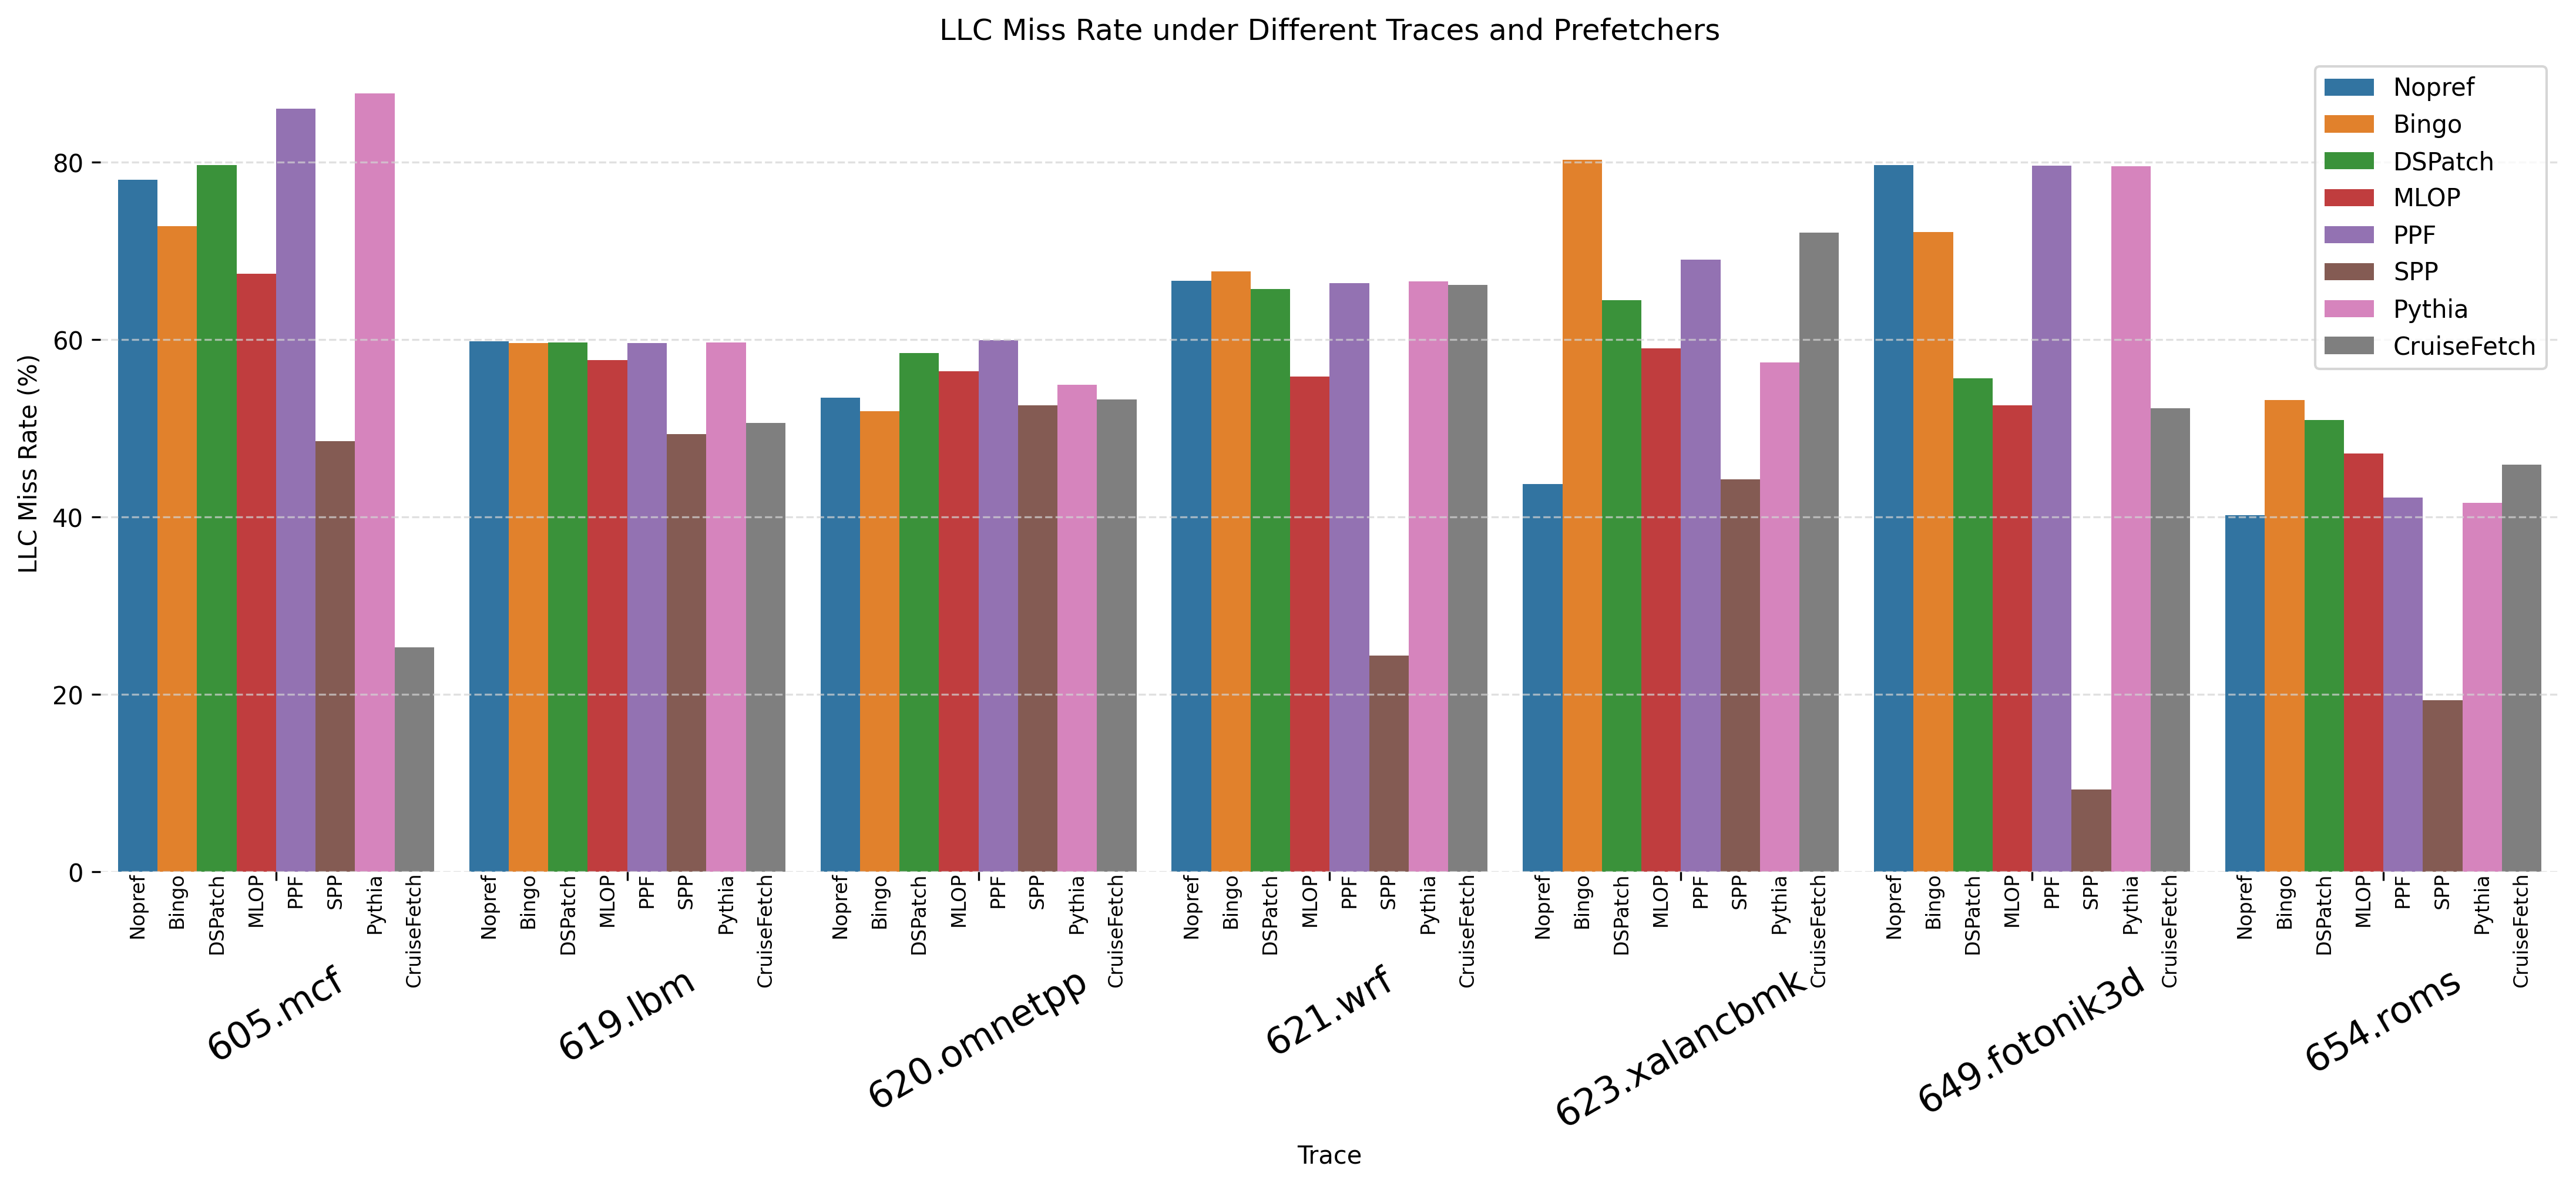

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/analysis_data.csv')


# Avoid division by zero
df['LLC_Miss_Rate'] = df['LLC_Miss_Rate'].fillna(0)

# Set the figure resolution
plt.rcParams['figure.dpi'] = 300

# Set the figure size, increase the width to provide more space for labels
plt.figure(figsize=(18, 8))

# Define the order of Prefetcher
prefetcher_order = ['Nopref', 'Bingo', 'DSPatch', 'MLOP', 'PPF', 'SPP', 'Pythia', 'CruiseFetch']
df['Prefetcher'] = pd.Categorical(df['Prefetcher'], categories=prefetcher_order, ordered=True)

# Sort the DataFrame by Trace and then by Prefetcher
df = df.sort_values(by=['Trace', 'Prefetcher'])

# Save the sorted data to a CSV file in the user's local directory
local_csv_path = "llc_miss_rate.csv"
df[['Trace', 'Prefetcher','LLC_Miss_Rate']].to_csv(local_csv_path, index=False)

print(f"CSV file saved successfully: {local_csv_path}")

# Plot the bar chart of LLC Miss Rate grouped by Prefetcher
bar_group_width = 0.9
bar_width = bar_group_width / len(df['Prefetcher'].unique())
ax = sns.barplot(data=df, x='Trace', y='LLC_Miss_Rate', hue='Prefetcher', width=bar_group_width)

# Get unique traces and prefetchers
traces = df['Trace'].unique()
prefetchers = df['Prefetcher'].unique()
num_prefetchers = len(prefetchers)
num_traces = len(traces)

# Add vertical Prefetcher labels below each bar group
prefetcher_label_offset = 0  # Adjust this value to move Prefetcher labels up or down
for i, trace in enumerate(traces):
    for j, prefetcher in enumerate(prefetchers):
        bar_x = i - bar_group_width / 2 + (j + 0.5) * bar_width
        ax.text(bar_x, prefetcher_label_offset, prefetcher, ha='center', va='top', rotation=90, fontsize=8)

# Set the title and axis labels
plt.title('LLC Miss Rate under Different Traces and Prefetchers')
plt.ylabel('LLC Miss Rate (%)')

# Move Trace labels down and adjust font size
trace_label_offset = -0.1  # Adjust this value to move Trace labels up or down
plt.xticks(range(num_traces), traces, rotation=30, ha='center', va='top', fontsize=15)
plt.gca().tick_params(axis='x', pad=0)
for tick in ax.get_xticklabels():
    tick.set_y(trace_label_offset)

# Adjust the subplot to make room for labels
plt.subplots_adjust(bottom=0.3)

# Optimize the y-axis grid lines (dashed lines)
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7, linewidth=0.8)

# Remove the spines (borders) of the plot for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the legend
plt.legend()

# Display the plot
plt.show()


CSV file saved successfully: llc_average_miss_latency.csv


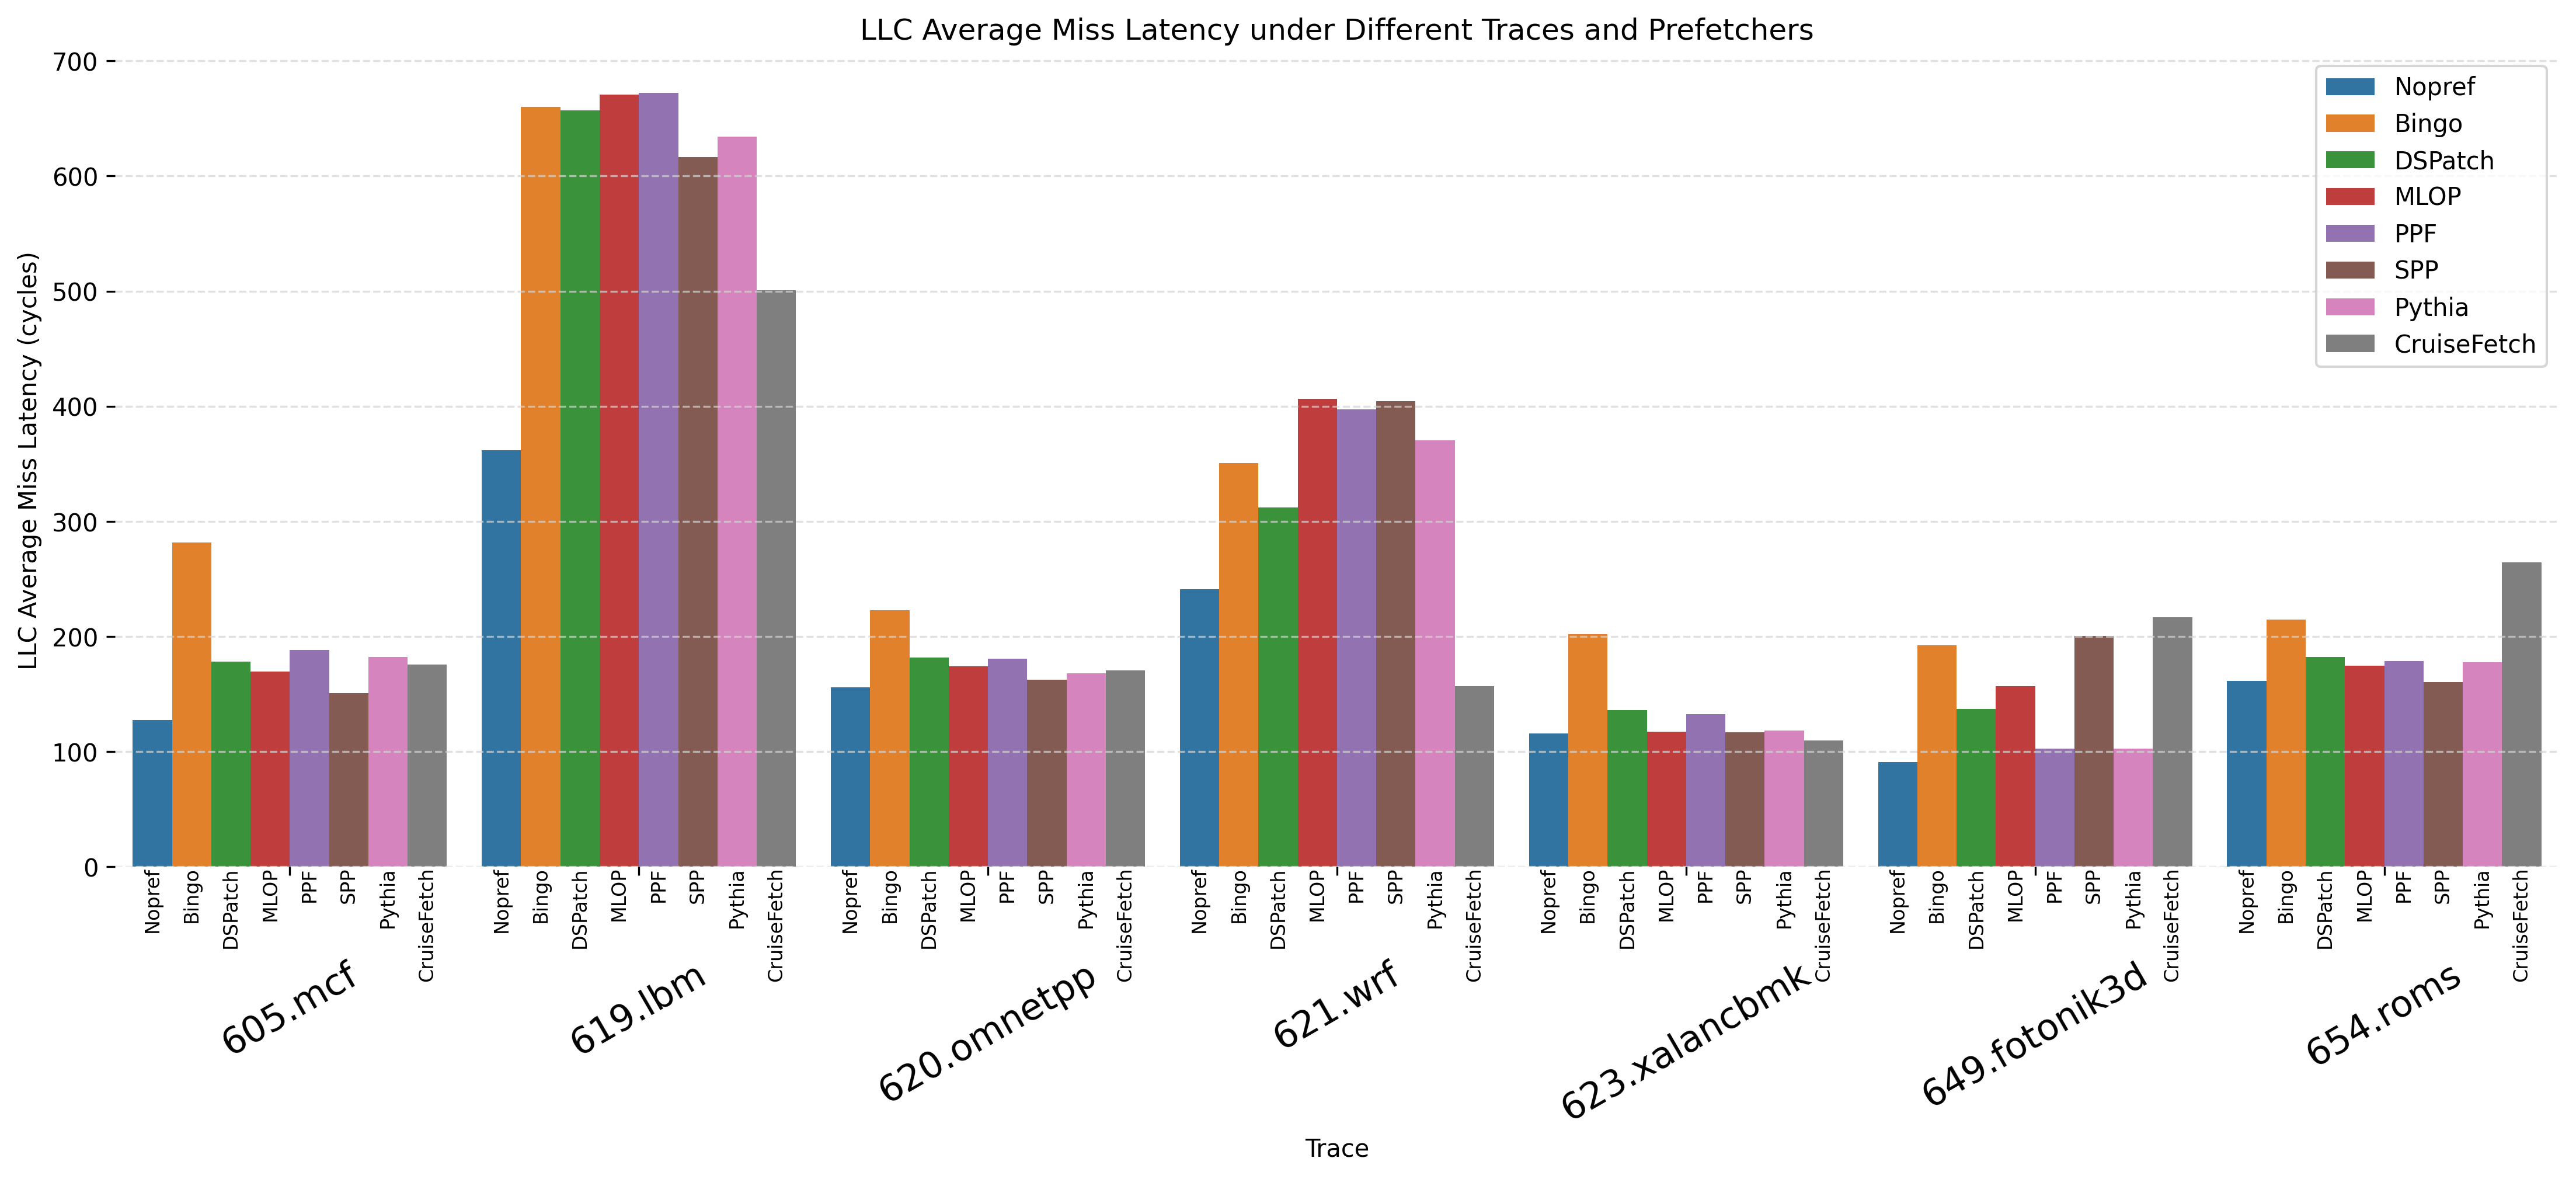

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/analysis_data.csv')


# Set the figure resolution
plt.rcParams['figure.dpi'] = 300

# Set the figure size, increase the width to provide more space for labels
plt.figure(figsize=(18, 8))

# Define the order of Prefetcher
prefetcher_order = ['Nopref', 'Bingo', 'DSPatch', 'MLOP', 'PPF', 'SPP', 'Pythia', 'CruiseFetch']
df['Prefetcher'] = pd.Categorical(df['Prefetcher'], categories=prefetcher_order, ordered=True)

# Sort the DataFrame by Trace and then by Prefetcher
df = df.sort_values(by=['Trace', 'Prefetcher'])

# Save the sorted data to a CSV file in the user's local directory
local_csv_path = "llc_average_miss_latency.csv"
df[['Trace', 'Prefetcher', 'LLC_Average_Miss_Latency']].to_csv(local_csv_path, index=False)

print(f"CSV file saved successfully: {local_csv_path}")

# Plot the bar chart of LLC Average Miss Latency grouped by Prefetcher
bar_group_width = 0.9
bar_width = bar_group_width / len(df['Prefetcher'].unique())
ax = sns.barplot(data=df, x='Trace', y='LLC_Average_Miss_Latency', hue='Prefetcher', width=bar_group_width)

# Get unique traces and prefetchers
traces = df['Trace'].unique()
prefetchers = df['Prefetcher'].unique()
num_prefetchers = len(prefetchers)
num_traces = len(traces)

# Add vertical Prefetcher labels below each bar group
prefetcher_label_offset = 0  # Adjust this value to move Prefetcher labels up or down
for i, trace in enumerate(traces):
    for j, prefetcher in enumerate(prefetchers):
        bar_x = i - bar_group_width / 2 + (j + 0.5) * bar_width
        ax.text(bar_x, prefetcher_label_offset, prefetcher, ha='center', va='top', rotation=90, fontsize=8)

# Set the title and axis labels
plt.title('LLC Average Miss Latency under Different Traces and Prefetchers')
plt.ylabel('LLC Average Miss Latency (cycles)')

# Move Trace labels down and adjust font size
trace_label_offset = -0.1  # Adjust this value to move Trace labels up or down
plt.xticks(range(num_traces), traces, rotation=30, ha='center', va='top', fontsize=15)
plt.gca().tick_params(axis='x', pad=0)
for tick in ax.get_xticklabels():
    tick.set_y(trace_label_offset)

# Adjust the subplot to make room for labels
plt.subplots_adjust(bottom=0.3)

# Optimize the y-axis grid lines (dashed lines)
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7, linewidth=0.8)

# Remove the spines (borders) of the plot for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the legend
plt.legend()

# Display the plot
plt.show()
